In [30]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [2]:
train = ImageDataGenerator(rescale=1/100)
test = ImageDataGenerator(rescale=1/100)

train_dataset = train.flow_from_directory("C:/Users/HP/Desktop/aml/Dataset/Train/",
                                          target_size=(400,400),
                                          batch_size = 32,
                                          class_mode = 'binary')
                                         
test_dataset = test.flow_from_directory("C:/Users/HP/Desktop/aml/Dataset/Test",
                                          target_size=(400,400),
                                          batch_size =32,
                                          class_mode = 'binary')
                                         

Found 213 images belonging to 2 classes.
Found 34 images belonging to 2 classes.


In [3]:
test_dataset.class_indices


{'no': 0, 'yes': 1}

In [4]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(400,400,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [5]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [6]:
history = model.fit(train_dataset, steps_per_epoch =len(train_dataset),epochs = 10,validation_data = test_dataset)

Epoch 1/10
7/7 [==============================] - 62s 8s/step - loss: 3.2384 - accuracy: 0.4789 - val_loss: 0.6368 - val_accuracy: 0.8235
Epoch 2/10
7/7 [==============================] - 55s 8s/step - loss: 0.5780 - accuracy: 0.7371 - val_loss: 0.4905 - val_accuracy: 0.7941
Epoch 3/10
7/7 [==============================] - 49s 7s/step - loss: 0.5369 - accuracy: 0.7840 - val_loss: 0.3911 - val_accuracy: 0.9118
Epoch 4/10
7/7 [==============================] - 50s 7s/step - loss: 0.4557 - accuracy: 0.7793 - val_loss: 0.3647 - val_accuracy: 0.9118
Epoch 5/10
7/7 [==============================] - 56s 8s/step - loss: 0.4003 - accuracy: 0.8310 - val_loss: 0.3700 - val_accuracy: 0.8824
Epoch 6/10
7/7 [==============================] - 51s 7s/step - loss: 0.3214 - accuracy: 0.8779 - val_loss: 0.4075 - val_accuracy: 0.7941
Epoch 7/10
7/7 [==============================] - 50s 7s/step - loss: 0.2601 - accuracy: 0.9249 - val_loss: 0.3938 - val_accuracy: 0.7647
Epoch 8/10
7/7 [==================

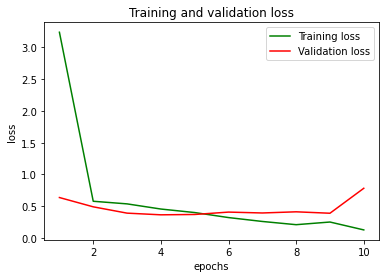

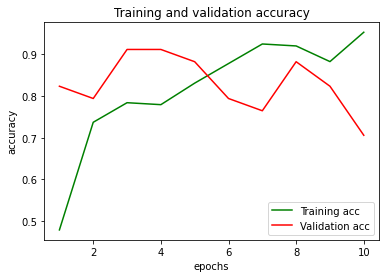

In [7]:
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs= range (1, len(loss) +1)
plt.plot(epochs,loss,'g',label='Training loss')
plt.plot(epochs,val_loss,'r',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()



acc=history.history['accuracy']
val_acc= history.history['val_accuracy']
plt.plot(epochs,acc,'g',label='Training acc')
plt.plot(epochs,val_acc,'r',label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [27]:
def predict_image(img):
    img_4d=img.reshape(-1,400,400,3)
    prediction=model.predict(img_4d)
    yes="This  person has a brain tumor(1)"
    no="This person does not has a brain tumor (0)"
    if prediction == 1 :
        return yes
    else:
        return no

In [28]:
import gradio as gr
outputs = gr.outputs.Textbox()
app = gr.Interface(fn=predict_image,inputs=gr.Image(shape=(400, 400)),outputs=outputs,description="Brain tumor Prediction System")
app.launch()

C:\Users\HP\anaconda3\lib\site-packages\gradio\outputs.py:21: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(


Running on local URL:  http://127.0.0.1:7867

To create a public link, set `share=True` in `launch()`.
